## Vector Diagram 

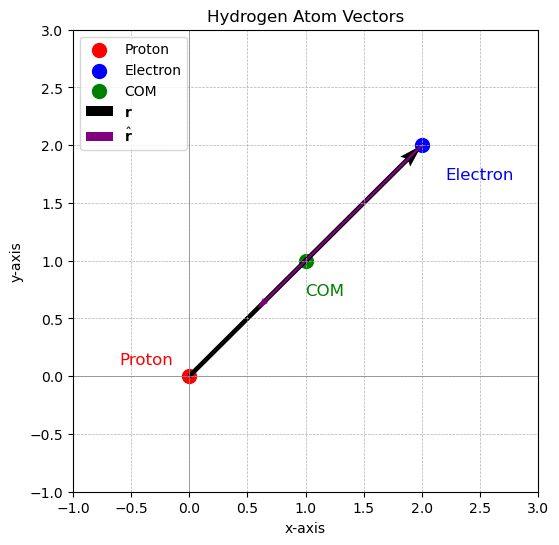

In [84]:
import numpy as np
import matplotlib.pyplot as plt

# Define positions
proton_pos = np.array([0, 0])     # Proton at origin
electron_pos = np.array([2, 2])   # Electron at (2,2)
com_pos = (proton_pos + electron_pos) / 2  # Center of Mass (approximate)

# Compute r vector and r-hat unit vector
r_vec = electron_pos - proton_pos
r_hat = r_vec / np.linalg.norm(r_vec)

# Create figure
fig, ax = plt.subplots(figsize=(6,6))

# Plot points
ax.scatter(*proton_pos, color='red', label='Proton', s=100)
ax.scatter(*electron_pos, color='blue', label='Electron', s=100)
ax.scatter(*com_pos, color='green', label='COM', s=100)

# Plot vectors
ax.quiver(*proton_pos, *r_vec, angles='xy', scale_units='xy', scale=1, color='black', label=r'$\mathbf{r}$', width=0.01)
ax.quiver(*electron_pos, *(-r_hat), angles='xy', scale_units='xy', scale=0.5, color='purple', label=r'$\hat{\mathbf{r}}$', width=0.005)

# Labels
ax.text(proton_pos[0]-0.6, proton_pos[1] + .1, 'Proton', fontsize=12, color='red')
ax.text(electron_pos[0]+0.2, electron_pos[1]-0.3, 'Electron', fontsize=12, color='blue')
ax.text(com_pos[0], com_pos[1]-0.3, 'COM', fontsize=12, color='green')

# Axis limits and grid
ax.set_xlim(-1, 3)
ax.set_ylim(-1, 3)
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_title('Hydrogen Atom Vectors')
ax.axhline(0, color='gray', linewidth=0.5)
ax.axvline(0, color='gray', linewidth=0.5)
ax.grid(True, linestyle='--', linewidth=0.5)

# Show legend
ax.legend(loc='upper left')
plt.savefig('hydrogen_atom_vectors.png')
plt.show()


## Simulation of First 3 Energy Levels

In [85]:
import numpy as np
from scipy import constants as const
from scipy import sparse as sparse
from scipy.sparse.linalg import eigs
from matplotlib import pyplot as plt

In [86]:
hbar = const.hbar
e = const.e
m_e = const.m_e
pi = const.pi
epsilon_0 = const.epsilon_0
joul_to_eV = e

In [87]:
def potential_energy(r):
    sparse_matrix = sparse.diags(diagonals=[1 / r], offsets=[0])
    prefactor = e**2 / (4 * pi * epsilon_0)
    return prefactor * sparse_matrix

In [88]:
def kinetic_energy(r):
    deltax = r[1] - r[0]
    main_diagonal = -2 / deltax**2 *np.ones(len(r))
    off_diagonal = 1 / deltax**2 * np.ones(len(r) - 1)
    sparse_matrix = sparse.diags([main_diagonal,off_diagonal,off_diagonal], (0, -1, 1))
    return - 1*hbar**2 / (2 * m_e) * sparse_matrix

In [89]:
def orbital_energy(r,l):
    prefactor = l*(l+1) * hbar**2 / (2 * m_e * r**2)
    return sparse.diags(prefactor  )

In [90]:
def hamiltonian(r,l):
    return potential_energy(r) + kinetic_energy(r) + orbital_energy(r,l)

In [91]:
N = 2000
l = 0
r = np.linspace(2e-9, 0.0, N, endpoint=False)
#hamiltonian = hamiltonian(r,l)
hamiltonian = build_hamiltonian(r)

In [92]:
number_of_eigenvalues = 30
eigenvalues, eigenvectors = eigs(hamiltonian, k=number_of_eigenvalues, which='SM')

In [93]:
eigenvectors = np.array([x for _, x in sorted(zip(eigenvalues, eigenvectors.T), key=lambda x: x[0].real)])
eigenvalues = sorted(eigenvalues.real)

In [94]:
densities = [np.absolute(eigenvectors[i,:]**2) for i in range(0, number_of_eigenvalues)]

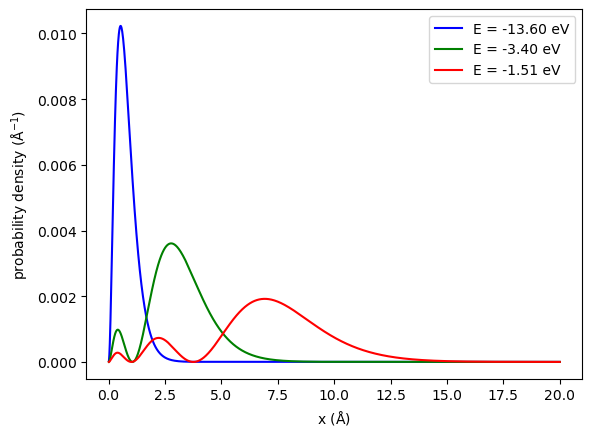

In [95]:
def plot(r, densities, eigenvalues):
    plt.xlabel('x ($\\mathrm{\AA}$)')
    plt.ylabel('probability density ($\\mathrm{\AA}^{-1}$)')
     
    energies = ['E = {: >5.2f} eV'.format(eigenvalues[i].real / e) for i in range(3)]
    plt.plot(r * 1e+10, densities[0], color='blue',  label=energies[0])
    plt.plot(r * 1e+10, densities[1], color='green', label=energies[1])
    plt.plot(r * 1e+10, densities[2], color='red',   label=energies[2])
     
    plt.legend()
    plt.show()
    return
 
""" plot results """
plot(r, densities, eigenvalues)

With L=0 in each case, we are plotting the 1s, 2s \& 3s Energy levels. They each have an energy of $E_{0}$, $\frac{E_{0}}{4}$, \& $\frac{E_{0}}{9}$.  